# Exploring DNN learning with TensorFlow

In this assignment we'll dive a little deeper with a series of hands on exercises to better understand DNN learning with Tensorflow. Remember that if you are taking the class for a certificate we will be asking you questions about the assignment in the test!

We start by setting up the problem for you.

In [9]:
# Load libraries
import sys

import tensorflow as tf
import matplotlib.pyplot as plt

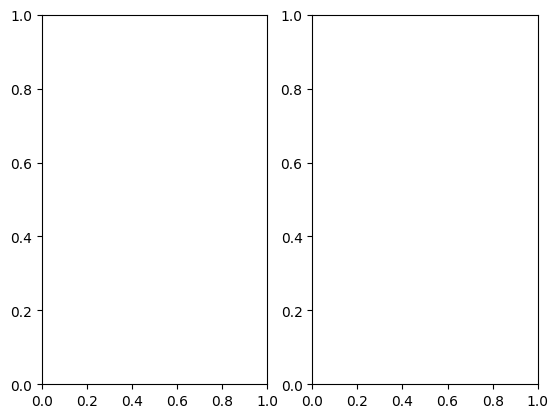

In [1]:
# This script requires TensorFlow 2 and Python 3.
if sys.version_info.major < 3:
    raise Exception((f"The script is developed and tested for Python 3. "
                     f"Current version: {sys.version_info.major}"))

if tf.__version__.split('.')[0] != '2':
    raise Exception((f"The script is developed and tested for tensorflow 2. "
                     f"Current version: {tf.__version__}"))

NameError: name 'sys' is not defined

In [36]:
# Load in fashion MNIST
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Define the base model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])



Neural Networks learn the best when the data is scaled / normalized to fall in a constant range. One practitioners often use is the range [0,1]. How might you do this to the training and test images used here?

*A hint: these images are saved in the standard [RGB](https://www.rapidtables.com/web/color/RGB_Color.html) format*

In [37]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Using these improved images lets compile our model using an adaptive optimizer to learn faster and a categorical loss function to differentiate between the the various classes we are trying to classify. Since this is a very simple dataset we will only train for 5 epochs.

In [15]:
epoches = range(5)

In [17]:
losses_per_epoch_512_with_two_layers = []
accuracy_per_epoch_512_with_two_layers = []

# compile the model
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(training_images, training_labels, epochs=5)

# fit the model to the training data
# model.fit(training_images, training_labels, epochs=5)


# test the model on the test data
model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.9010 - loss: 0.2651
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9052 - loss: 0.2514
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9111 - loss: 0.2362
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9133 - loss: 0.2302
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9169 - loss: 0.2221
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8824 - loss: 0.3251


[0.3224858045578003, 0.8853999972343445]

In [19]:

losses_per_epoch_512_with_two_layers = history.history['loss']
accuracy_per_epoch_512_with_two_layers = history.history['accuracy']
print(losses_per_epoch_512_with_two_layers)
print(accuracy_per_epoch_512_with_two_layers)

[0.2669154405593872, 0.25238358974456787, 0.241166889667511, 0.23041753470897675, 0.22107388079166412]
[0.2669154405593872, 0.25238358974456787, 0.241166889667511, 0.23041753470897675, 0.22107388079166412]
[0.9003166556358337, 0.9050666689872742, 0.9093000292778015, 0.9141166806221008, 0.9169666767120361]


Once it's done training -- you should see an accuracy value at the end of the final epoch. It might look something like 0.8648. This tells you that your neural network is about 86% accurate in classifying the training data. I.E., it figured out a pattern match between the image and the labels that worked 86% of the time. But how would it work with unseen data? That's why we have the test images. We can call ```model.evaluate```, and pass in the two sets, and it will report back the loss for each. This should reach about .8747 or thereabouts, showing about 87% accuracy. Not Bad!

But what did it actually learn? If we inference on the model using ```model.predict``` we get out the following list of values. **What does it represent?**

*A hint: trying running ```print(test_labels[0])```*

In [20]:
classifications = model.predict(test_images)
print(classifications[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[1.2576822e-11 8.2558285e-15 3.3806679e-13 8.5982257e-18 1.9209495e-12
 8.9143294e-05 6.4481385e-12 2.5469044e-04 1.1274243e-11 9.9965620e-01]


Let's now look at the layers in your model. What happens if you double the number of neurons in the dense layer. What different results do you get for loss, training time etc? Why do you think that's the case?

In [22]:
NUMBER_OF_NEURONS = 1024
losses_per_epoch_1024_with_two_layers = []
accuracy_per_epoch_1024_with_two_layers = []
# define the new model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(NUMBER_OF_NEURONS, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# compile fit and evaluate the model again
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history2 = model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)

losses_per_epoch_1024_with_two_layers = history2.history['loss']
accuracy_per_epoch_1024_with_two_layers = history2.history['accuracy']

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - accuracy: 0.7938 - loss: 0.5824
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 21ms/step - accuracy: 0.8667 - loss: 0.3634
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 14ms/step - accuracy: 0.8793 - loss: 0.3242
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.8894 - loss: 0.2993
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 15ms/step - accuracy: 0.8943 - loss: 0.2835
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8634 - loss: 0.3772


Consider the effects of additional layers in the network instead of simply more neurons to the same layer. First update the model to add an additional dense layer into the model between the two existing Dense layers.

In [23]:
YOUR_NEW_LAYER = tf.keras.layers.Dense(256, activation=tf.nn.relu)

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    YOUR_NEW_LAYER,
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Lets then compile, fit, and evaluate our model. What happens to the error? How does this compare to the original model and the model with double the number of neurons?

In [24]:
# compile fit and evaluate the model again
losses_per_epoch_512_with_three_layers = []
accuracy_per_epoch_512_with_three_layers = []

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history3  = model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)

losses_per_epoch_512_with_three_layers = history3.history['loss']
accuracy_per_epoch_512_with_three_layers = history3.history['accuracy']

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.7908 - loss: 0.5863
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8641 - loss: 0.3658
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8806 - loss: 0.3184
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8892 - loss: 0.2917
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8962 - loss: 0.2757
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8813 - loss: 0.3533


Before you trained, you normalized the data. What would be the impact of removing that? To see it for yourself fill in the following lines of code to get a non-normalized set of data and then re-fit and evaluate the model using this data.

In [25]:
# get new non-normalized mnist data
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images_non = training_images
test_images_non = test_images

losses_per_epoch_non_normalized = []
accuracy_per_epoch_non_normalized = []

# re-compile, re-fit and re-evaluate
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    YOUR_NEW_LAYER,
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history4 =model.fit(training_images_non, training_labels, epochs=5)
model.evaluate(test_images_non, test_labels)
classifications = model.predict(test_images_non)

losses_per_epoch_non_normalized = history4.history['loss']
accuracy_per_epoch_non_normalized = history4.history['accuracy']

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.6269 - loss: 4.9502
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.7388 - loss: 0.6719
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.7849 - loss: 0.5880
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.8279 - loss: 0.4855
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8350 - loss: 0.4799
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8078 - loss: 0.5164
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


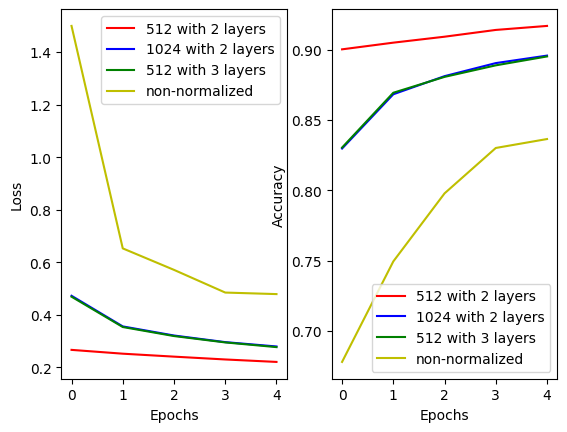

In [34]:
figure , (ax1, ax2) = plt.subplots(1,2)
ax1.plot(epoches, losses_per_epoch_512_with_two_layers,'r', label='512 with 2 layers')
ax1.plot(epoches, losses_per_epoch_1024_with_two_layers,'b', label='1024 with 2 layers')
ax1.plot(epoches, losses_per_epoch_512_with_three_layers,'g', label='512 with 3 layers')
ax1.plot(epoches, losses_per_epoch_non_normalized,'y', label='non-normalized')

ax2.plot(epoches, accuracy_per_epoch_512_with_two_layers,'r', label='512 with 2 layers')
ax2.plot(epoches, accuracy_per_epoch_1024_with_two_layers,'b', label='1024 with 2 layers')
ax2.plot(epoches, accuracy_per_epoch_512_with_three_layers,'g', label='512 with 3 layers')
ax2.plot(epoches, accuracy_per_epoch_non_normalized,'y', label='non-normalized')

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax1.legend()
ax2.legend()

plt.show()


Sometimes if you set the training for too many epochs you may find that training stops improving and you wish you could quit early. Good news, you can! TensorFlow has a function called ```Callbacks``` which can check the results from each epoch. Modify this callback function to make sure it exits training early but not before reaching at least the second epoch!

*A hint: logs.get(METRIC_NAME) will return the value of METRIC_NAME at the current step*

In [39]:
# define and instantiate your custom Callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.86) and epoch >=2:
      self.model.stop_training = True

callbacks = myCallback()

# re-compile, re-fit and re-evaluate
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                            tf.keras.layers.Dense(512, activation=tf.nn.relu),
                            YOUR_NEW_LAYER,
                            tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer = tf.keras.optimizers.Adam(),
      loss = 'sparse_categorical_crossentropy',
      metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.7855 - loss: 0.5950
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8670 - loss: 0.3641
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8798 - loss: 0.3259
